In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from datetime import datetime
import random

# Loading Dataset

In [2]:
clean_sample_df = pd.read_csv('data/clean_sample.csv',index_col = 0)

# EDA

In [3]:
clean_sample_df["age"] = 2020 - clean_sample_df["birth year"]
clean_sample_df.drop("Unnamed: 0.1", inplace=True, axis=1)

In [4]:
clean_sample_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'start date', 'Maximum Temperature',
       'Minimum Temperature', 'Temperature', 'PRCP', 'SNOW', 'start hour',
       'stop hour', 'start_date', 'start year', 'start month', 'start day',
       'start dayofweek', 'Isweekday', 'stop date', 'distance', 'trip per day',
       'daily avg trip duration', 'daily avg distance', 'trip per hour',
       'hourly avg trip duration', 'hourly avg distance',
       'trip per hour eachday', 'hourly avg trip duration eachday',
       'hourly avg distance eachday', 'start station checkout counts',
       'start station checkin counts', 'start station total counts',
       'end station checkout counts', 'end station checkin counts',
       'end station t

In [5]:
clean_sample_df["start station checkout counts"].describe()

count    241761.000000
mean          1.110316
std           0.345601
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: start station checkout counts, dtype: float64

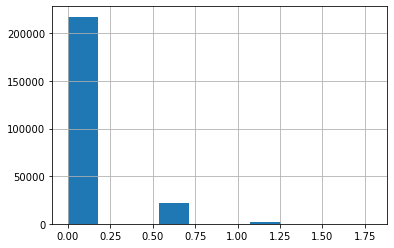

In [6]:
np.log(clean_sample_df["start station checkout counts"]).hist()

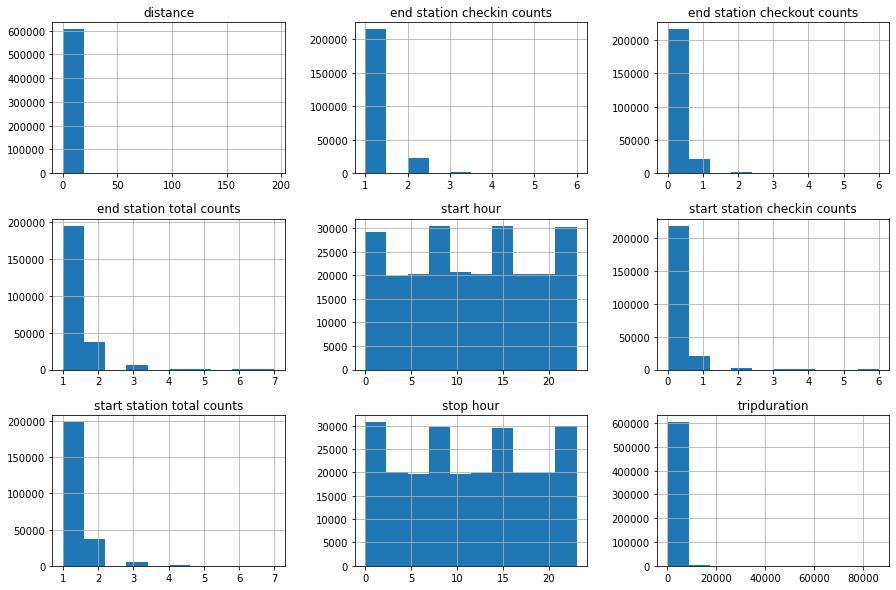

In [7]:
clean_sample_df[['tripduration', 'start hour','stop hour','start station checkin counts',\
          'start station total counts','distance','end station checkin counts','end station checkout counts',\
         'end station total counts']].hist(figsize=(15,10));

## Hours Data

In [8]:
hours_df = clean_sample_df[['start hour','trip per hour', 'hourly avg trip duration', 'hourly avg distance']].sort_values(by='start hour')
hours_df.columns = ['Hour','Hourly Trip Count','Avg Trip Duration','Avg Distance']

### Hourly Trip Count

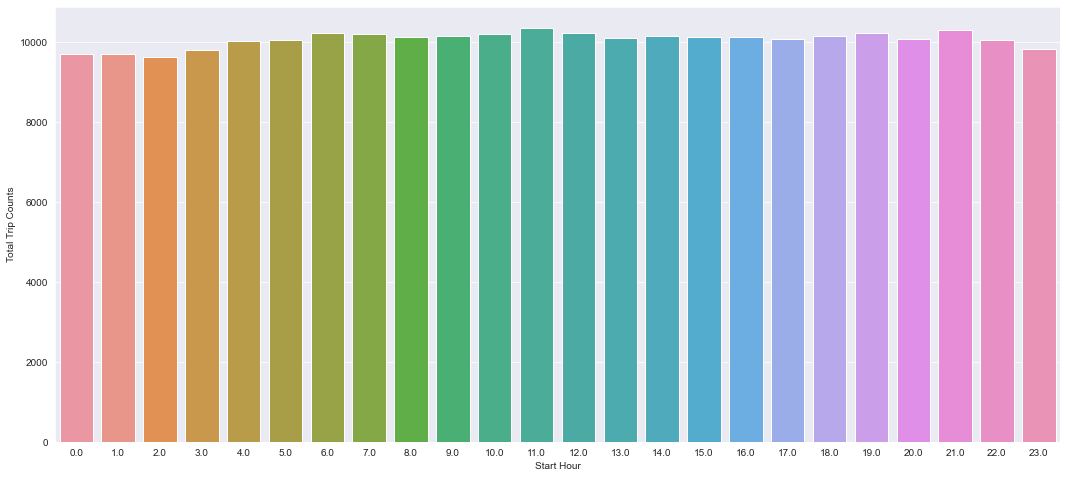

In [9]:
hour_df = clean_sample_df.groupby('start hour').count()[['tripduration']].reset_index()
hour_df.columns=['Start Hour','Total Trip Counts']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Start Hour', 'Total Trip Counts',data = hour_df);

### Hourly Trip Duration

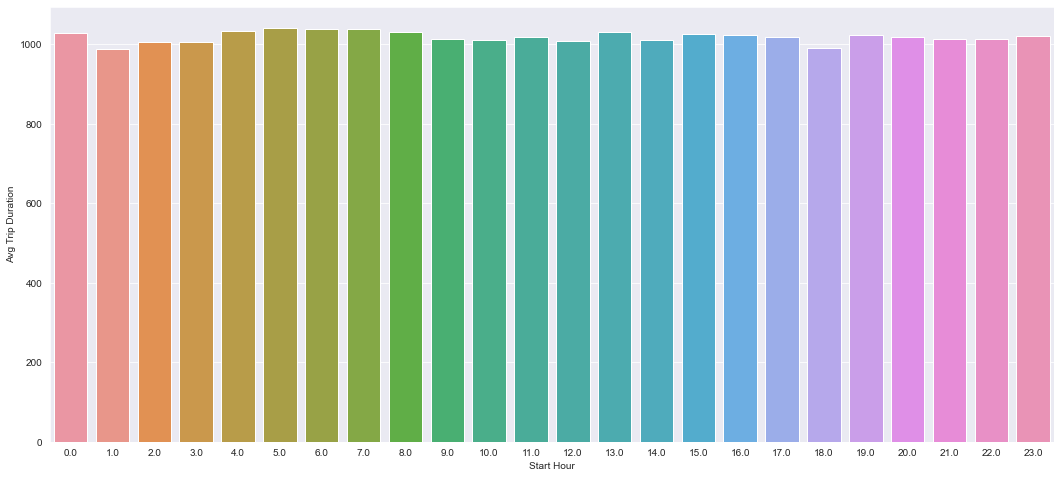

In [10]:
hour_df = clean_sample_df.groupby('start hour').mean()[['tripduration']].reset_index()
hour_df.columns=['Start Hour','Avg Trip Duration']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Start Hour', 'Avg Trip Duration',data = hour_df);

### Hourly Trip Distance

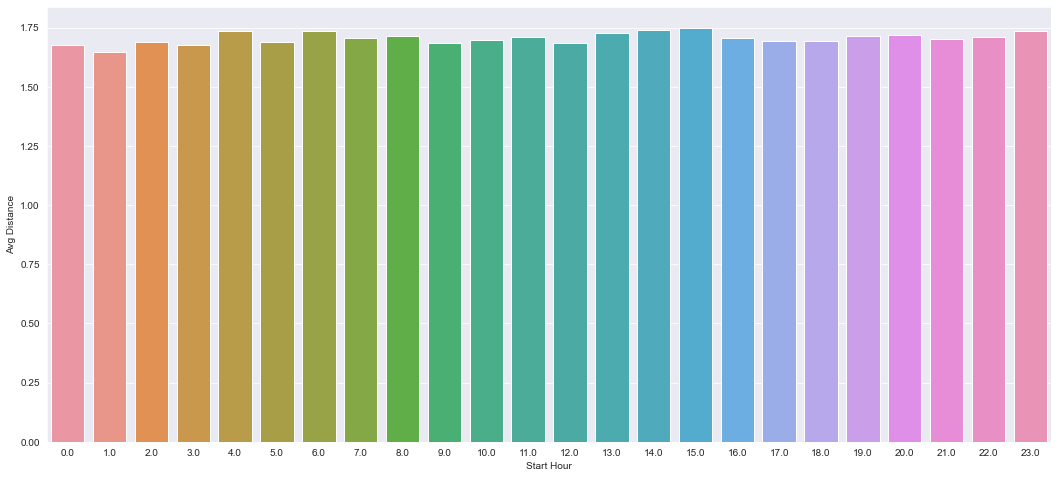

In [11]:
hour_df = clean_sample_df.groupby('start hour').mean()[['distance']].reset_index()
hour_df.columns=['Start Hour','Avg Distance']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Start Hour', 'Avg Distance',data = hour_df);

### Most start stations in rush hours

In [12]:
start_rush_hour = clean_sample_df[clean_sample_df["start hour"].apply(lambda x: x in {7,8,9,16,17,18})
   ].groupby("start station name")["bikeid"].count().sort_values(ascending=False).head(10)
start_rush_hour

start station name
W 21 St & 6 Ave                  354
Pershing Square North            349
E 17 St & Broadway               310
West St & Chambers St            300
E 13 St & Avenue A               299
12 Ave & W 40 St                 296
Christopher St & Greenwich St    289
Broadway & E 22 St               285
1 Ave & E 68 St                  285
Broadway & E 14 St               283
Name: bikeid, dtype: int64

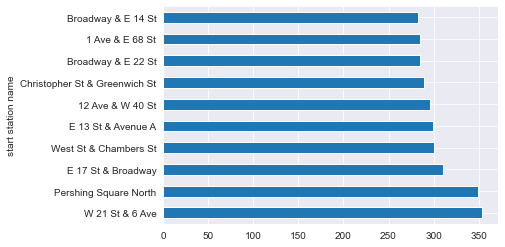

In [13]:
start_rush_hour.plot.barh()

### Most start stations in non-rush hours

In [14]:
start_non_rush_hour = clean_sample_df[clean_sample_df["start hour"].apply(lambda x: x in {0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23})
   ].groupby("start station name")["bikeid"].count().sort_values(ascending=False).head(10)
start_non_rush_hour

start station name
Pershing Square North            924
W 21 St & 6 Ave                  900
12 Ave & W 40 St                 849
E 17 St & Broadway               836
Broadway & W 60 St               830
West St & Chambers St            811
Broadway & E 22 St               804
Broadway & E 14 St               798
Christopher St & Greenwich St    788
1 Ave & E 68 St                  730
Name: bikeid, dtype: int64

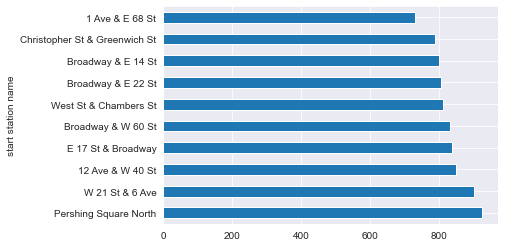

In [15]:
start_non_rush_hour.plot.barh()

### Most end stations in rush hours

In [16]:
end_rush_hour = clean_sample_df[clean_sample_df["stop hour"].apply(lambda x: x in {7,8,9,16,17,18})
   ].groupby("end station name")["bikeid"].count().sort_values(ascending=False).head(10)
end_rush_hour

end station name
E 17 St & Broadway               329
Christopher St & Greenwich St    325
12 Ave & W 40 St                 313
West St & Chambers St            307
Broadway & E 22 St               305
Pershing Square North            301
Broadway & W 60 St               299
W 21 St & 6 Ave                  294
Broadway & E 14 St               274
8 Ave & W 31 St                  273
Name: bikeid, dtype: int64

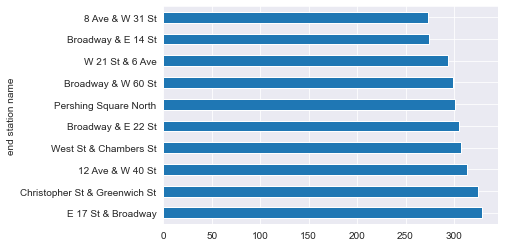

In [17]:
end_rush_hour.plot.barh()

### Most end stations in non-rush hours

In [18]:
end_non_rush_hour = clean_sample_df[clean_sample_df["stop hour"].apply(lambda x: x in {0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23})
   ].groupby("end station name")["bikeid"].count().sort_values(ascending=False).head(10)
end_non_rush_hour

end station name
E 17 St & Broadway               943
W 21 St & 6 Ave                  929
West St & Chambers St            925
12 Ave & W 40 St                 923
Pershing Square North            914
Broadway & E 22 St               870
Broadway & E 14 St               817
Christopher St & Greenwich St    813
Broadway & W 60 St               796
Broadway & W 25 St               779
Name: bikeid, dtype: int64

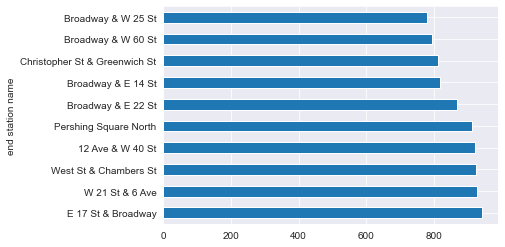

In [19]:
end_non_rush_hour.plot.barh()

## Daily Data

In [20]:
daily_df = clean_sample_df[['start dayofweek', 'trip per day','daily avg trip duration','daily avg distance']].sort_values(by='start dayofweek')
daily_df.columns=["Day", 'Avg Trip Counts','Avg Trip Duration','Avg Distance'] 

### Daily Total Trip Counts

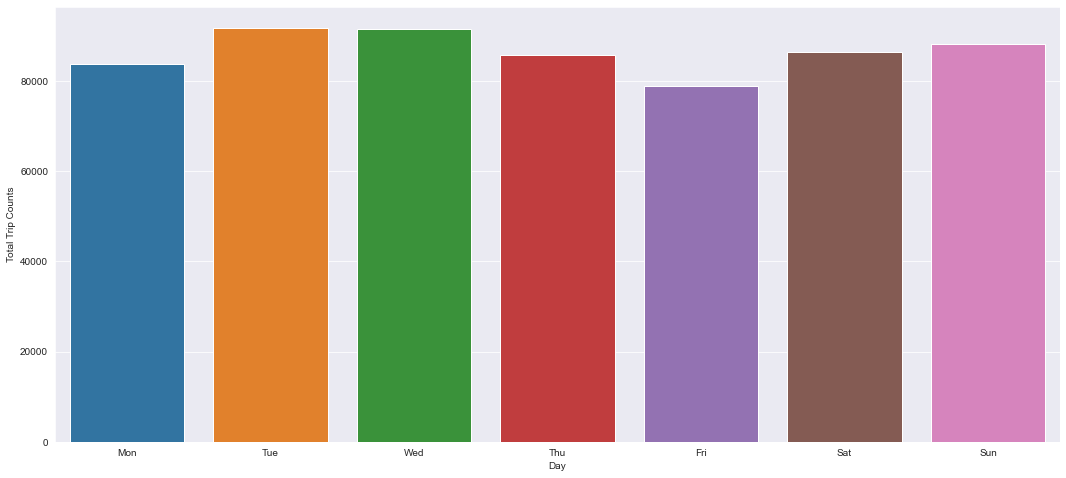

In [21]:
day_df = clean_sample_df.groupby('start dayofweek').count()[['tripduration']].reset_index()
day_df.columns=['Day','Total Trip Counts']
day_df["Day"] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Day', 'Total Trip Counts',data = day_df);

### Daily Average Trip Duration

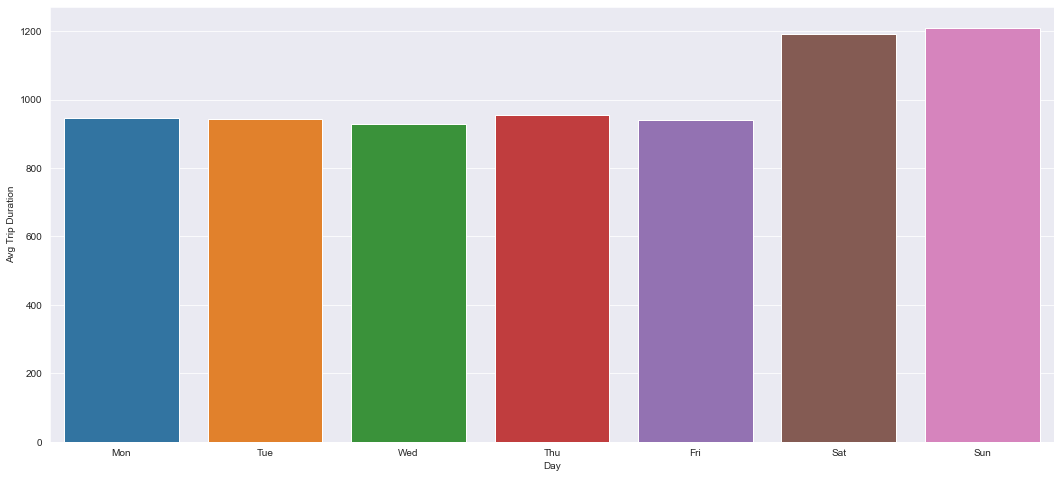

In [22]:
day_df = clean_sample_df.groupby('start dayofweek').mean()[['tripduration']].reset_index()
day_df.columns=['Day','Avg Trip Duration']
day_df["Day"] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Day', 'Avg Trip Duration',data = day_df);

### Daily Average Distance

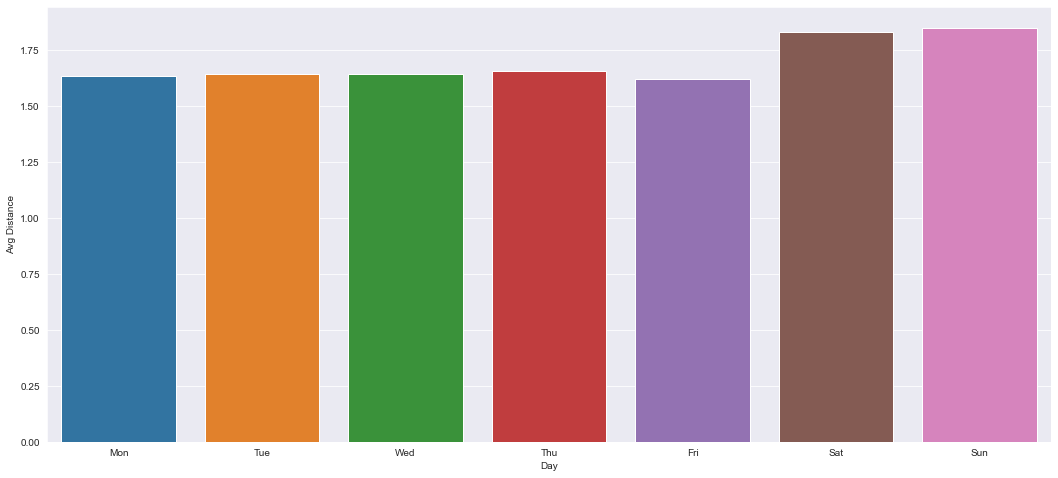

In [23]:
day_df = clean_sample_df.groupby('start dayofweek').mean()[['distance']].reset_index()
day_df.columns=['Day','Avg Distance']
day_df["Day"] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Day', 'Avg Distance',data = day_df);

## Monthly Data

### Monthly Average Trip Counts

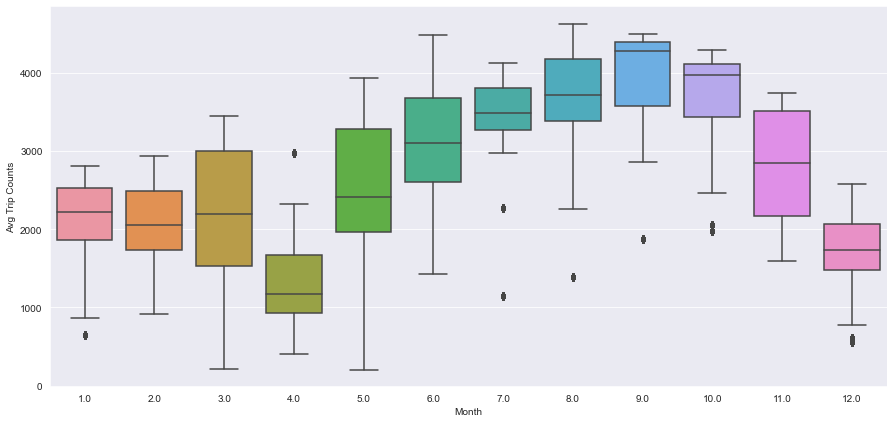

In [24]:
monthly_df = clean_sample_df[['start month','trip per day','daily avg trip duration','daily avg distance']].sort_values(by='start month')
monthly_df.columns=['Month','Avg Trip Counts','Avg Trip Duration','Avg Distance'] 
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.boxplot(x="Month", y="Avg Trip Counts", data=monthly_df);

### Monthly Total Trip Counts

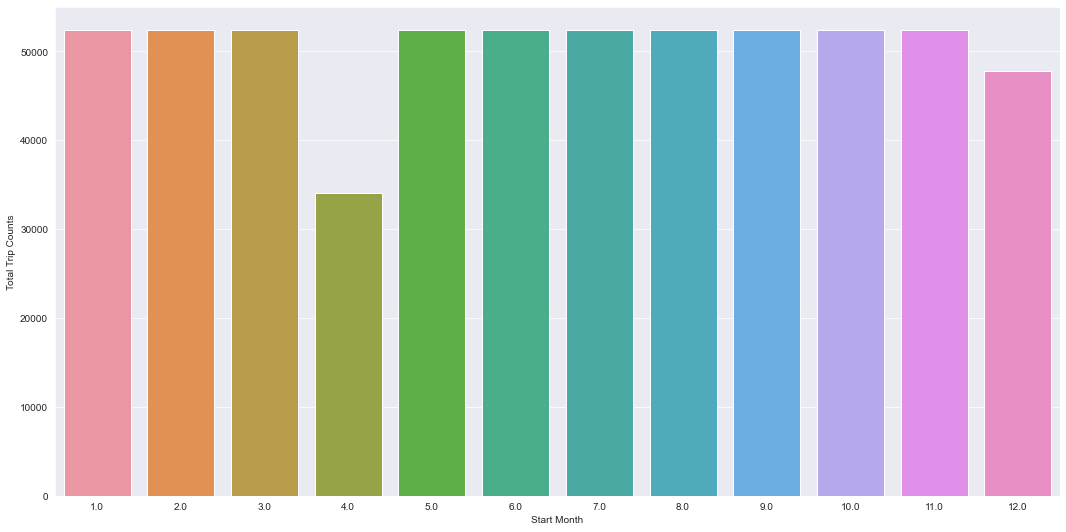

In [25]:
monthly_trip = clean_sample_df.groupby('start month').count()[['tripduration']].reset_index()
monthly_trip.columns=['Start Month','Total Trip Counts']
plt.figure(figsize=(18,9))
sns.set_style('darkgrid')
sns.barplot('Start Month', 'Total Trip Counts',data = monthly_trip);

### Monthly Average Trip Duration

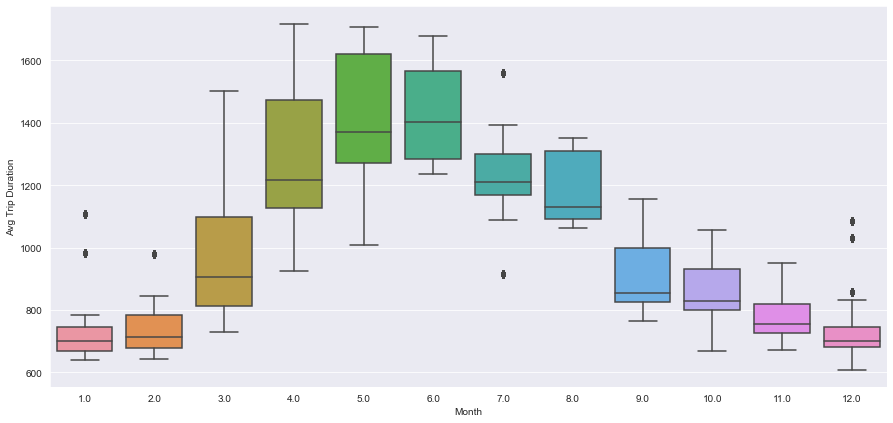

In [26]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.boxplot(x="Month", y="Avg Trip Duration",  data=monthly_df);

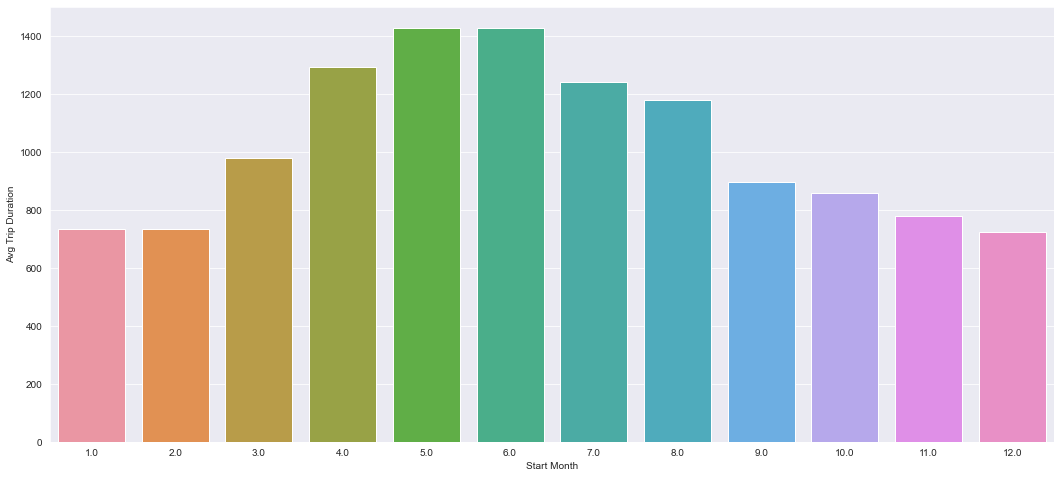

In [27]:
monthly_tripduration = clean_sample_df.groupby('start month').mean()[['tripduration']].reset_index()
monthly_tripduration.columns=['Start Month','Avg Trip Duration']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Start Month','Avg Trip Duration', data = monthly_tripduration);

### Monthly Average Bike Distance

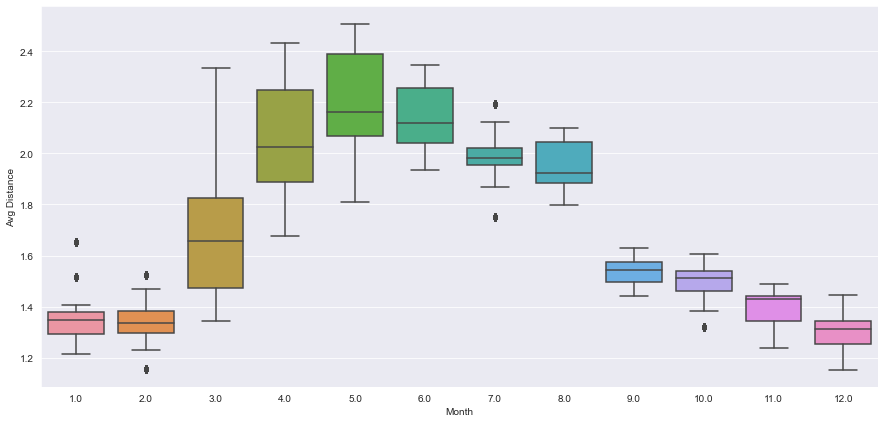

In [28]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.boxplot(x="Month", y="Avg Distance", data=monthly_df);

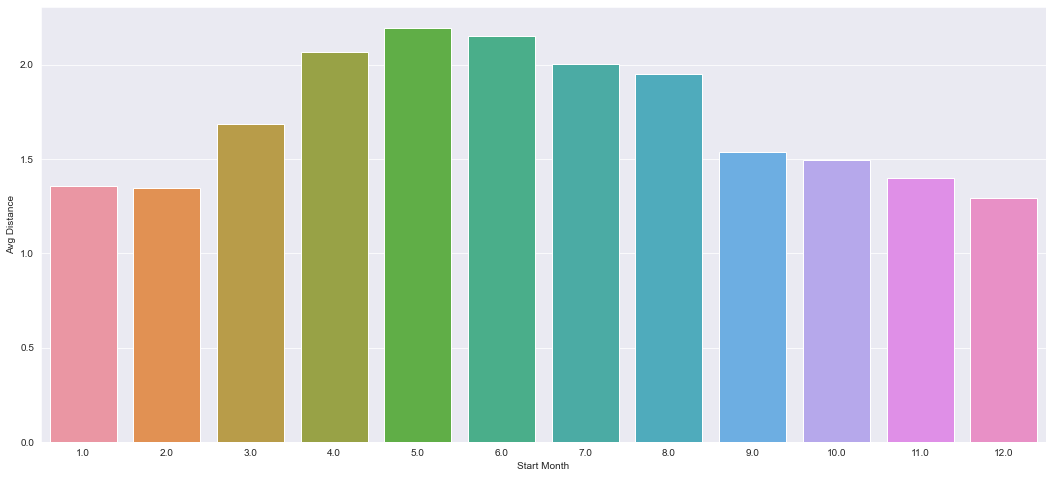

In [29]:
monthly_distance = clean_sample_df.groupby('start month').mean()[['distance']].reset_index()
monthly_distance.columns=['Start Month','Avg Distance']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Start Month','Avg Distance',data=monthly_distance);

## Weekdays and Weekends Data

Text(0.5, 0, 'Is Weekday')

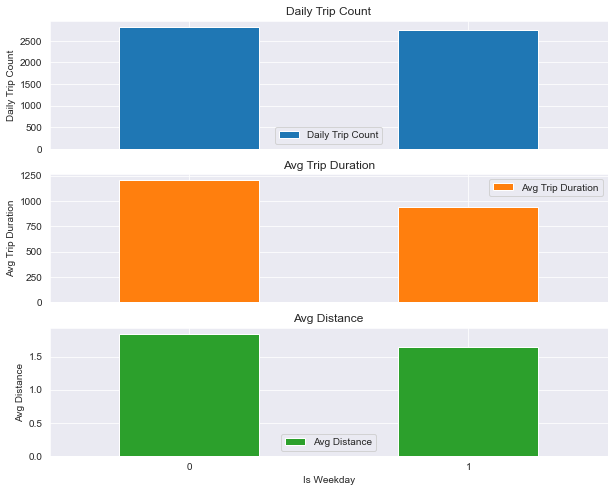

In [30]:
Weekday = clean_sample_df[['Isweekday','trip per day','daily avg trip duration','daily avg distance']]
Weekday.columns =  ['Isweekday','Daily Trip Count','Avg Trip Duration','Avg Distance']
Weekday = Weekday.groupby('Isweekday').agg('mean').reset_index()
cols_plot = ['Daily Trip Count','Avg Trip Duration','Avg Distance']
axes = Weekday[cols_plot].plot(kind='bar', linestyle='None', figsize=(10, 8), subplots=True,rot = 0);
axes[0].set_ylabel('Daily Trip Count')
axes[1].set_ylabel('Avg Trip Duration')
axes[2].set_ylabel('Avg Distance')
axes[2].set_xlabel('Is Weekday')

## Seasonal Time Series

In [31]:
daily_trip = clean_sample_df[['start date','trip per day','daily avg trip duration','daily avg distance']].sort_values(by='start date')
daily_trip.columns = ['Date','Daily Trip Count','Avg Trip Duration','Avg Distance']
daily_trip = daily_trip.groupby('Date').agg('mean').reset_index().set_index('Date')

Text(0, 0.5, 'Avg Distance(mile)')

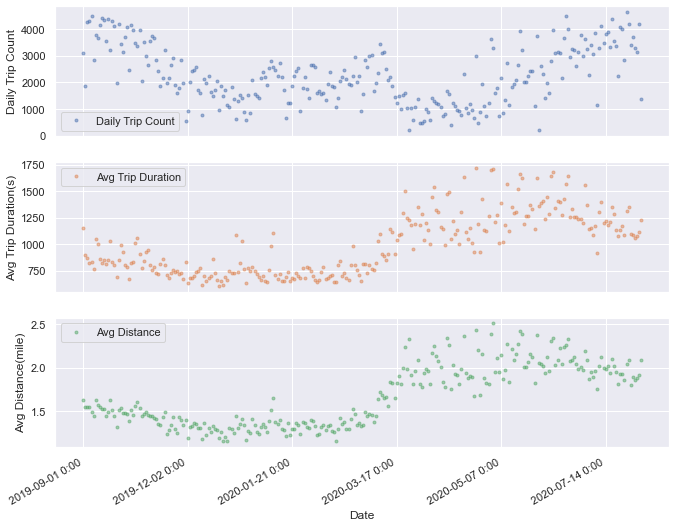

In [32]:
sns.set(rc={'figure.figsize':(13, 6)})
cols_plot = ['Daily Trip Count','Avg Trip Duration','Avg Distance']
axes = daily_trip[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
axes[0].set_ylabel('Daily Trip Count')
axes[1].set_ylabel('Avg Trip Duration(s)')
axes[2].set_ylabel('Avg Distance(mile)')

## Weather Impact

### Temperature impact by ride counts

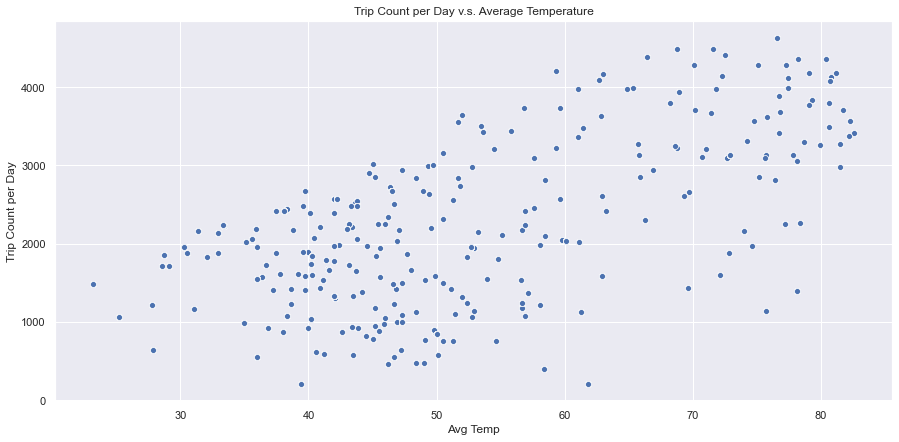

In [33]:
temper = clean_sample_df[['Temperature','tripduration','trip per day','daily avg distance']]
temper.columns = ['Avg Temp','Avg Trip Duration','Trip Count per Day','Avg Distance']
plt.figure(figsize=(15,7))
sns.scatterplot(x='Avg Temp',y='Trip Count per Day',data = temper).set(title = 'Trip Count per Day v.s. Average Temperature');

### Weather Conditions impact by Ride Counts

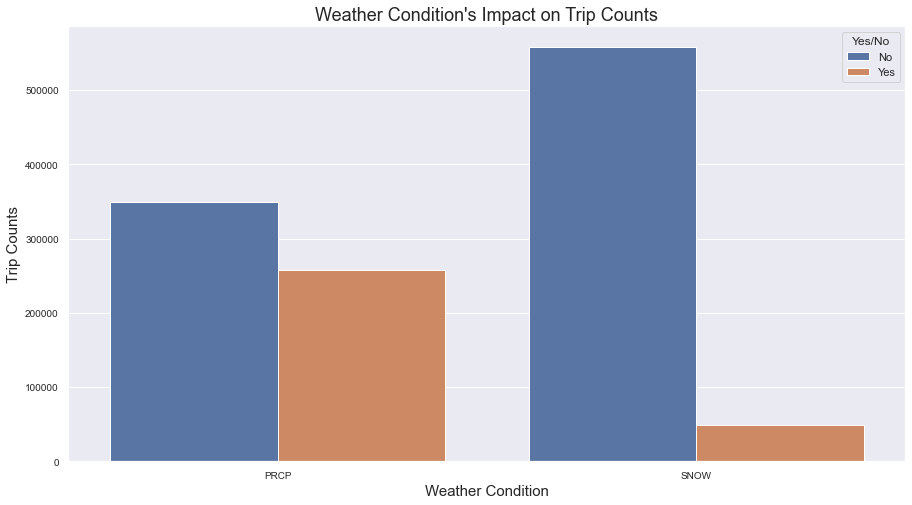

In [34]:
weather = clean_sample_df[['PRCP', 'SNOW']].apply(pd.value_counts)
weather= weather.unstack().reset_index()
weather.columns=['Weather Condition','Yes/No','Trip Counts']
weather['Yes/No']=['Yes' if x==1 else 'No' for x in weather['Yes/No']]
plt.figure(figsize=(15,8))
plt.rcParams["axes.labelsize"] = 15
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Weather Condition's Impact on Trip Counts", fontdict = {'fontsize' : 18})
sns.barplot(x='Weather Condition', y ='Trip Counts', hue ='Yes/No', data = weather);

## User Type

Text(0.5, 0, 'User Type')

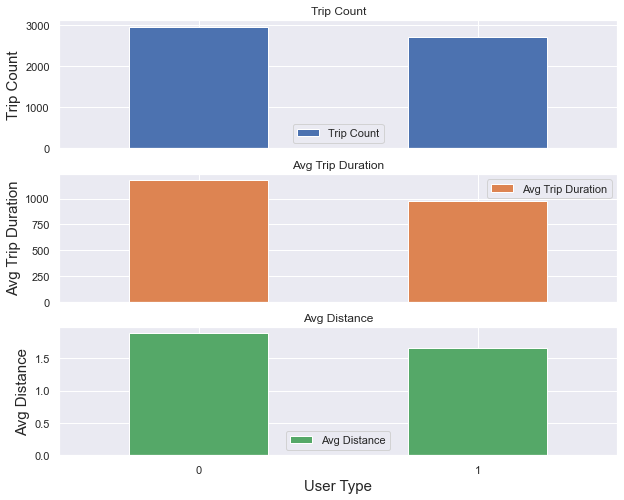

In [35]:
user_type = clean_sample_df[['usertype','trip per day','daily avg trip duration','daily avg distance']]
user_type.columns =  ['User Type','Trip Count','Avg Trip Duration','Avg Distance']
user_type = user_type.groupby('User Type').agg('mean').reset_index()
cols_plot = ['Trip Count','Avg Trip Duration','Avg Distance']
axes = user_type[cols_plot].plot(kind='bar', linestyle='None', figsize=(10, 8), subplots=True,rot = 0);
axes[0].set_ylabel('Trip Count')
axes[1].set_ylabel('Avg Trip Duration')
axes[2].set_ylabel('Avg Distance')
axes[2].set_xlabel('User Type')

## Gender

Text(0.5, 0, 'Gender')

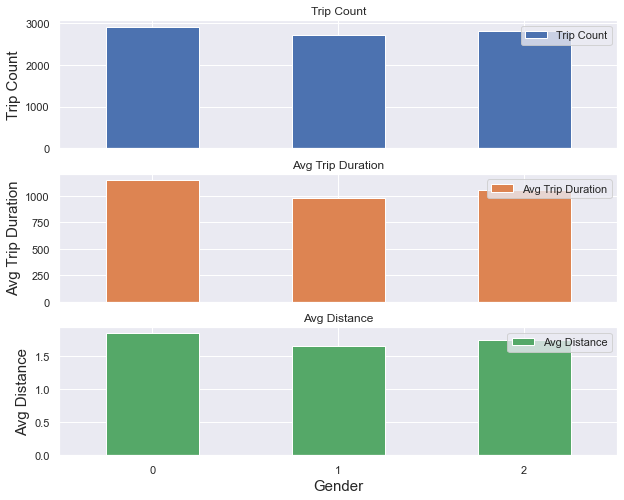

In [36]:
gender = clean_sample_df[['gender','trip per day','daily avg trip duration','daily avg distance']]
gender.columns =  ['Gender','Trip Count','Avg Trip Duration','Avg Distance']
gender = gender.groupby('Gender').agg('mean').reset_index()
cols_plot = ['Trip Count','Avg Trip Duration','Avg Distance']
axes = gender[cols_plot].plot(kind='bar', linestyle='None', figsize=(10, 8), subplots=True,rot = 0);
axes[0].set_ylabel('Trip Count')
axes[1].set_ylabel('Avg Trip Duration')
axes[2].set_ylabel('Avg Distance')
axes[2].set_xlabel('Gender')

## Age

### Total Trip Counts by Each Ages

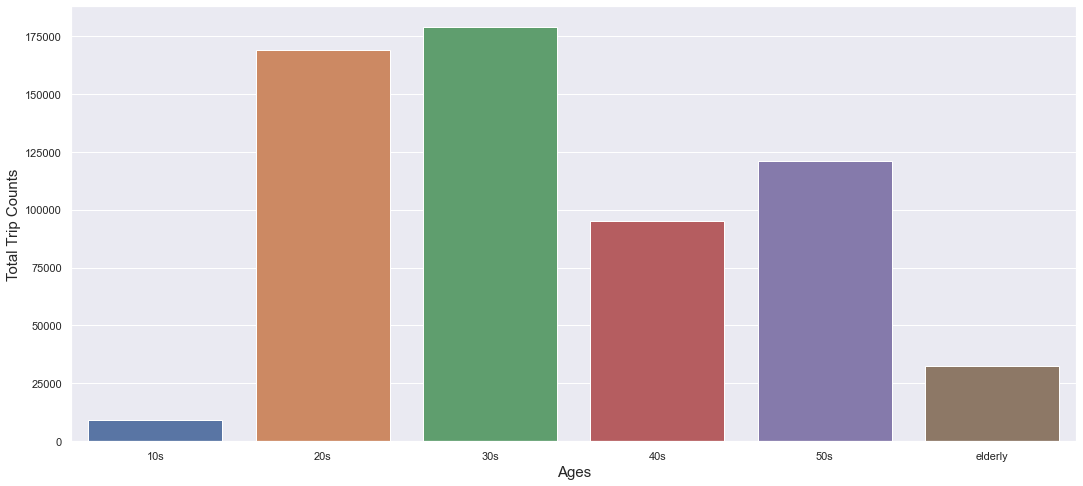

In [37]:
clean_sample_df["ages"] = pd.cut(clean_sample_df.age, bins=[10, 20, 30, 40, 50, 60, 200], labels = ["10s", "20s", "30s", "40s", "50s", "elderly"])
age_trip = clean_sample_df.groupby('ages').count()[['tripduration']].reset_index()
age_trip.columns=['Ages','Total Trip Counts']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Ages', 'Total Trip Counts',data = age_trip);

### Average Trip Durations by Each Ages

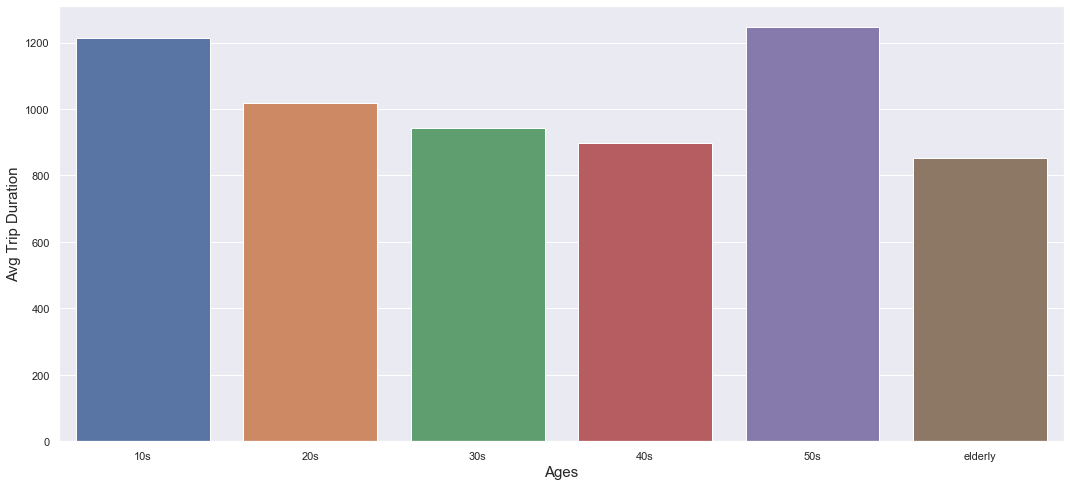

In [38]:
age_tripduration = clean_sample_df.groupby('ages').mean()[['tripduration']].reset_index()
age_tripduration.columns=['Ages','Avg Trip Duration']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Ages', 'Avg Trip Duration',data = age_tripduration);

### Average Distances by Each Ages

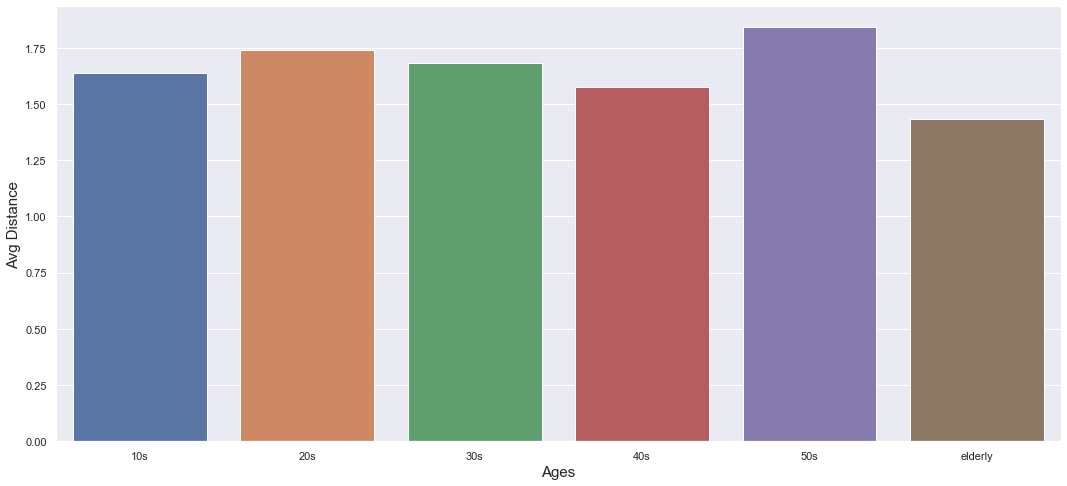

In [39]:
age_distance = clean_sample_df.groupby('ages').mean()[['distance']].reset_index()
age_distance.columns=['Ages','Avg Distance']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Ages','Avg Distance',data=age_distance);

## Most 100 Dock Stations

In [40]:
most100_ID = list(clean_sample_df.groupby(['start station id']).agg({'tripduration':'count'}).\
sort_values(by='tripduration',ascending=False).head(100).index)

In [41]:
most100 = clean_sample_df.loc[clean_sample_df['start station id'].isin(most100_ID)]

In [42]:
selected_cols=['start station latitude','start station longitude', 'start hour',\
               'start year','start month','start day','start dayofweek','start station checkout counts',\
               'start station checkin counts','Isweekday', 'Temperature', 'PRCP', 'SNOW'] 
most100 = most100[selected_cols]

In [43]:
most100.drop_duplicates(inplace=True)

In [44]:
most100.to_csv('Most100_Stations.csv')